In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [25]:
#Ładowanie z wybranego pliku .txt
file_name = "..//src//"+input("Podaj nazwe pliku z danymi: ")

data_frame = pd.read_csv(file_name,sep="\\s+",header=None,engine="python")


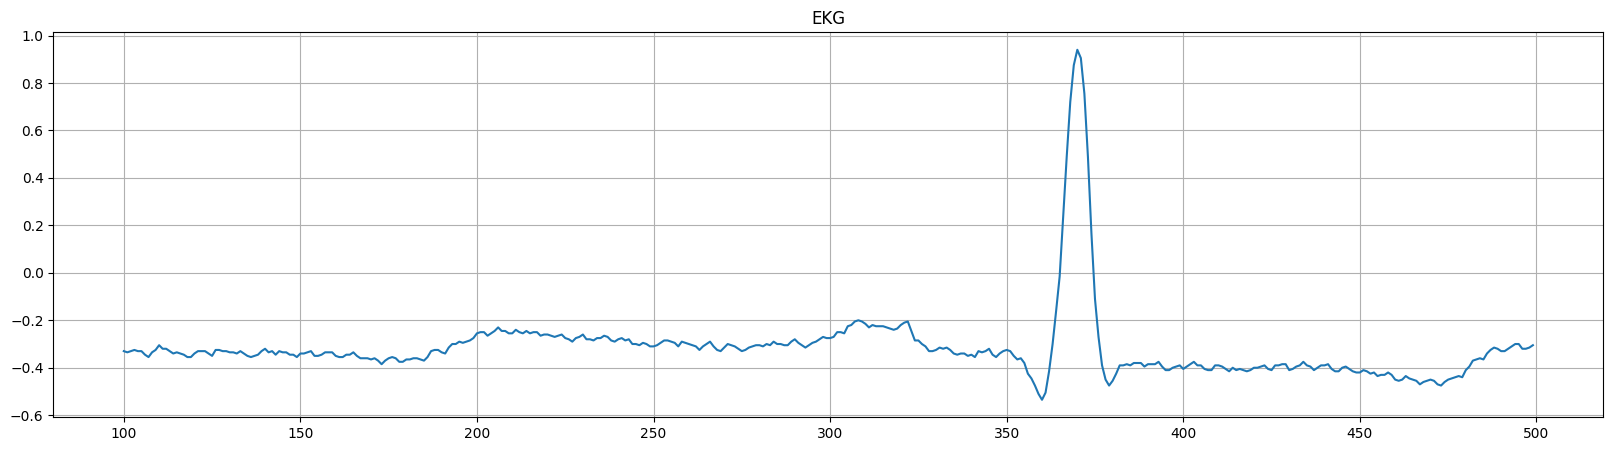

In [28]:
#Wykres EKG (Na podstawie pobranych danych) w zakresie start : end
num_rows = len(data_frame)
start = input("Początek zakresu(Minimalnie 0): ")
end = input("Koniec zakresu(Maksymalnie "+str( num_rows )+"): ")
if start == "":
    start = 0
if end == "":
    end = num_rows
start = int(start)
end = int(end)

data_frame.columns = ['data']
new_data = data_frame.iloc[int( start ):int( end )].copy()
font = {'size':20}
num_rows = len(new_data)
font = {'size':20}
plt.figure(figsize=(20,5))
plt.plot(new_data['data'])
plt.grid(True)
plt.title("EKG")
plt.show()


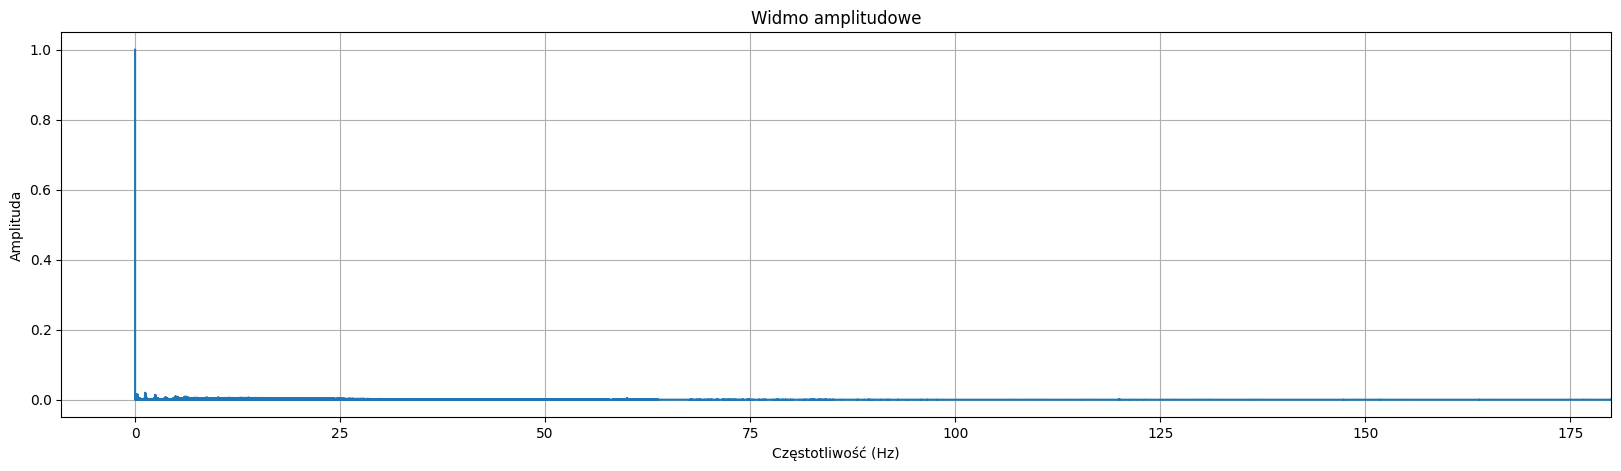

In [14]:
#Generacja i wyświetlenie widma sygnału
fs = 360
t = len(data_frame)

fourier1 = np.fft.fft(data_frame['data'])

widmo = np.abs(fourier1)
abs_widmo = widmo / np.max(widmo)
freq = np.fft.fftfreq(t,1/fs)
pos_freq = freq[:len(freq)//2]
pos_widmo = abs_widmo[:len(abs_widmo)//2]

plt.figure(figsize=(20,5))
plt.plot(pos_freq,pos_widmo)
plt.xlim(right = fs/2)
plt.grid(True)
plt.title("Widmo amplitudowe")
plt.xlabel('Częstotliwość (Hz)')
plt.ylabel('Amplituda')

plt.show()


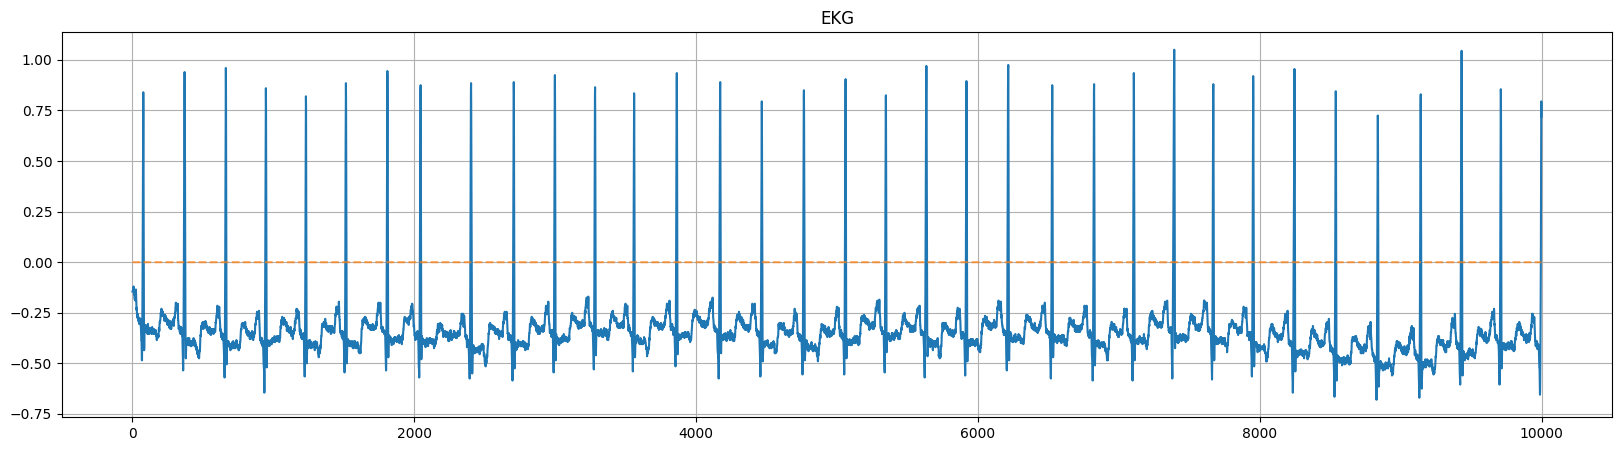

In [ ]:
#Wizualizacja różnicy odwrotnej transformaty(Utworzonej na podstawie widma) i sygnału
inv_fourier = np.fft.ifft(fourier1).real
inv_fourier = data_frame['data'] - inv_fourier
inv_fourier = inv_fourier.values[start:end]
plt.figure(figsize=(20,5))
plt.plot(new_data['data'])
plt.plot(inv_fourier, linestyle="dashed", alpha=0.7)
plt.grid(True)
plt.title("EKG")
plt.show()
